# Data visualization

In [1]:
### Importing libraries and data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [3]:
dir_path = os.getcwd()
df_path = dir_path + "\\data\\Project 2 Dataset.xls"
df = pd.read_excel(df_path, skiprows=1)

### Correlation matrix

[Text(0.5, 1.0, 'Correlation matrix')]

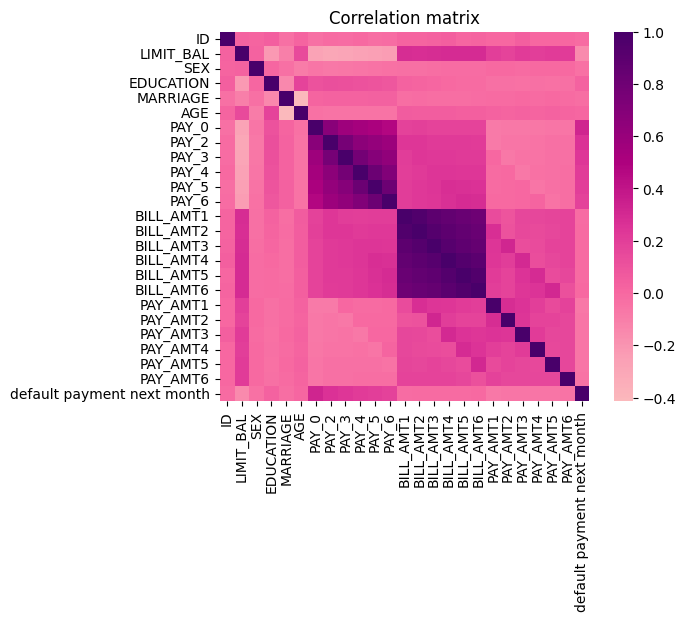

In [4]:
corr = df.corr(numeric_only= False )
sns.heatmap(corr, center=0,cmap= "RdPu", square=True).set(title="Correlation matrix")


We can see that group of features of the same time with temporal translation are highly correlated 

In [5]:
# plt.colormaps()

In [6]:
df['SEX'] = df['SEX'].map({1:'Male',2:'Female'})
df['EDUCATION'] = df['EDUCATION'].map({1: "graduate school", 2: "university", 3: "high school", 4:"others", 5:"others",6: "others", 0: "missing value"})
df['MARRIAGE'] = df['MARRIAGE'].map({1: "married",2: "single", 3: "others", 0: "missing value"})

df = df.rename(columns = {"PAY_0": "PAY_9",
                          "PAY_2": "PAY_8",
                          "PAY_3": "PAY_7",
                          "PAY_4": "PAY_6",
                          "PAY_5": "PAY_5",
                          "PAY_6": "PAY_4"})

### Label Proportion

[Text(0.5, 1.0, 'Count target label samples')]

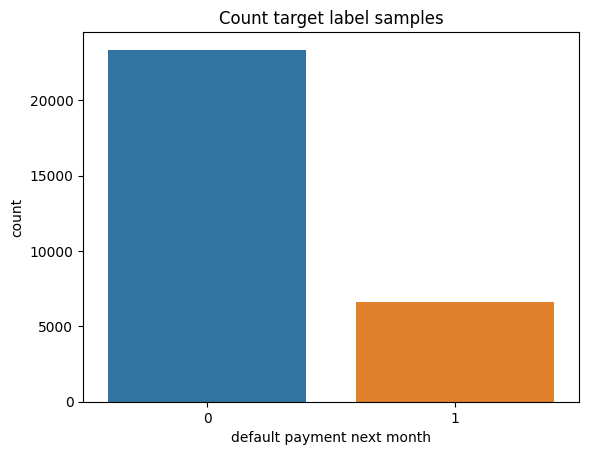

In [7]:
sns.countplot(data = df, x="default payment next month").set(title='Count target label samples')


Target label is highly imbalanced

### Correlations between features and target

[Text(0.5, 1.0, 'Limit balance boxplot vs label')]

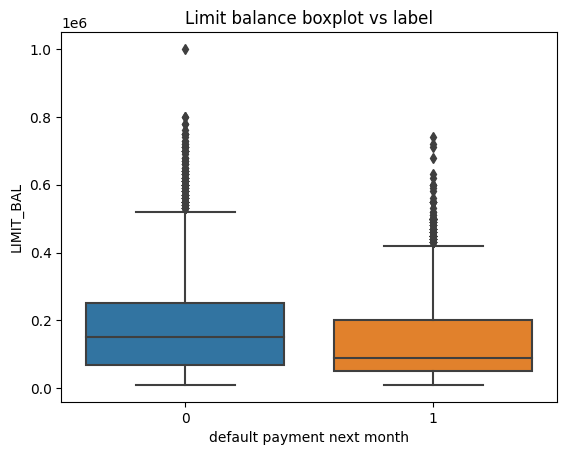

In [8]:

# Load the data into a Pandas DataFrame

# Create the boxplot
sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df).set(title='Limit balance boxplot vs label')


[Text(0.5, 1.0, 'Age boxplot vs label')]

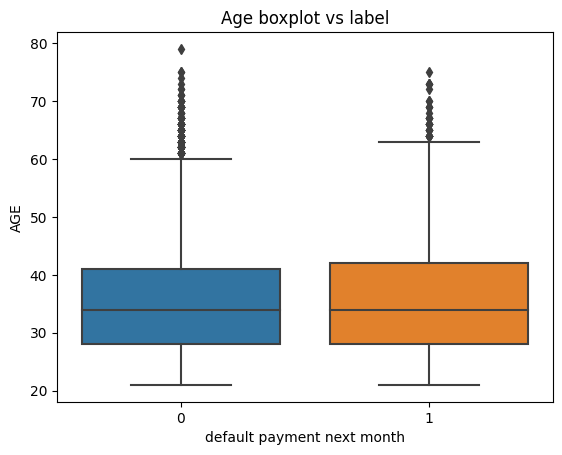

In [9]:

sns.boxplot(x="default payment next month", y="AGE", data=df).set(title='Age boxplot vs label')

In [10]:
def plot_proportion_plot(column_name, title=None, axis=None, sort=True):
    if axis is None:
        fig, axis = plt.subplots()
        fig.suptitle(title)
    counts_df = df.groupby([column_name, "default payment next month"])["ID"].count().unstack()
    percentages = counts_df.T.div(counts_df.T.sum()).T
    if sort:
        percentages = percentages.sort_values(0)
    percentages.plot(kind="bar", stacked=True, color=["green", "red"], ax=axis)

    axis.set_xlabel(f"{column_name} value")
    axis.set_ylabel("Proportion")


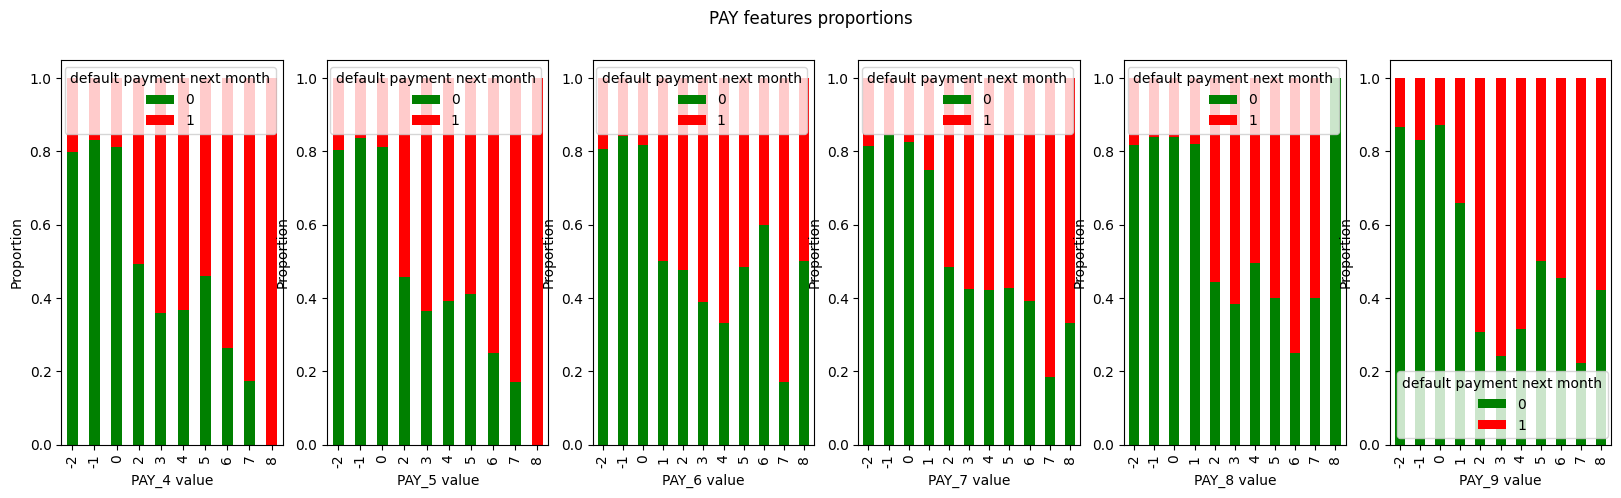

In [11]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
columns_names = [f"PAY_{i}" for i in range(4, 10)]
for i in range(6):
    plot_proportion_plot(columns_names[i],axis = ax[i], sort=False)
fig.suptitle(f"PAY features proportions");


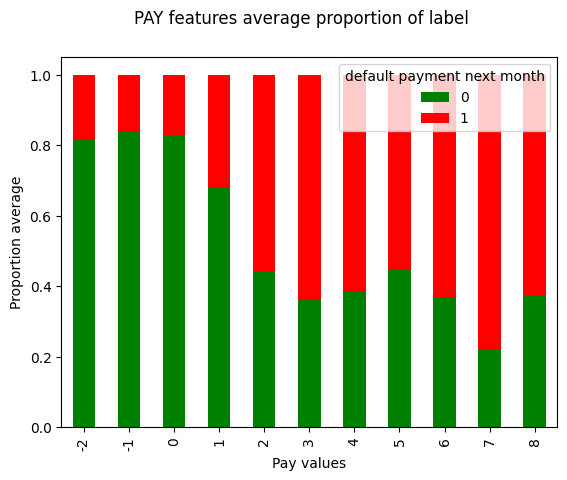

In [12]:
proportions = []
columns_names = [f"PAY_{i}" for i in range(4, 10)]
for col in columns_names:
    counts_df = df.groupby([col, "default payment next month"])["ID"].count().unstack()
    props = counts_df.T.div(counts_df.T.sum()).T
    props = props.fillna(0)
    proportions.append(props)

proportions = pd.concat(proportions)
mean_proportions = proportions.groupby(proportions.index).mean()


fig, axis = plt.subplots()
mean_proportions.plot(kind="bar", stacked=True, color=["green", "red"], ax = axis )

axis.set_xlabel("Pay values")
axis.set_ylabel("Proportion average")
fig.suptitle(f"PAY features average proportion of label");


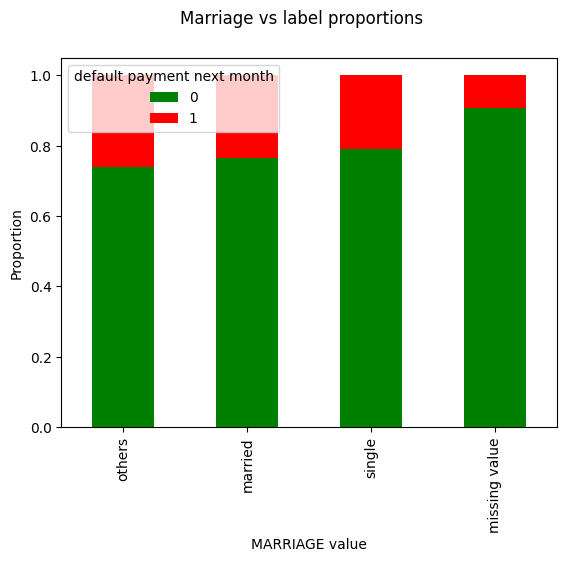

In [13]:
plot_proportion_plot("MARRIAGE", title= "Marriage vs label proportions")
plt.savefig("marriage_proportion_EDA", bbox_inches='tight')

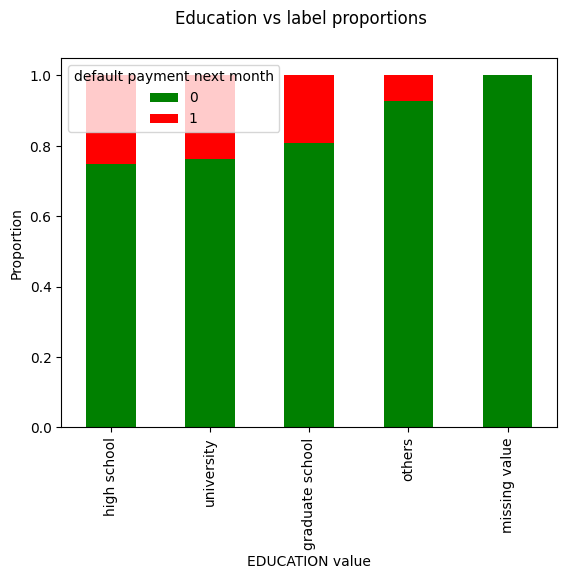

In [14]:
plot_proportion_plot("EDUCATION", title= "Education vs label proportions")
plt.savefig("education_proportion_EDA", bbox_inches='tight')


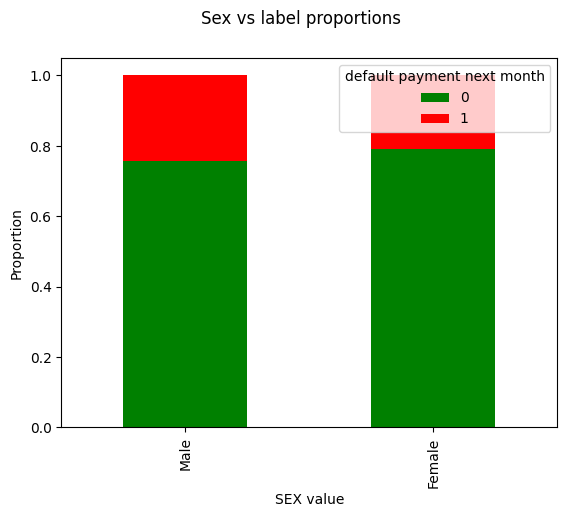

In [15]:
plot_proportion_plot("SEX", title= "Sex vs label proportions")
plt.savefig("sex_proportion_EDA", bbox_inches='tight')